<a href="https://colab.research.google.com/github/AmirAflak/Filimo-movies-analysis/blob/main/filimo_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filimo Movies Analysis (400 Records)
###If you looking for some cool persian movies on [Filimo](https://www.filimo.com/) , I challange you to look up this project , It will be helpfull !!
### Here are some tasks that i'm curious about them in order to find suitable movies : 

1.   Number of movies based on each genre.
2.   Number of rates for each movie.
3.   Number of productions based on year.
4.   Directors with most productions.
5.   Actors with most productions.
6.   The most rated movies on filimo.
7.   Comparsion between imdb & filimo rates.
###So... keep in mind above questions respectively and let's dig into it :))

In [ ]:
# import necessary packages for our analysis :
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline  as po 
import plotly.graph_objs as go

In [ ]:
'''
reading csv file that contains dataset (400 records)
and also look it up
''' 
df = pd.read_csv('filimo.csv')
df.head()

,Unnamed: 0,Title,Genre,Production,Actor,Producer,Rate,Rate_percent,Imdb
0,0,هفته ای یک بار آدم باش,خانوادگی - کمدی,1399.0,"['پژمان جمشیدی', 'رعنا آزادی ور', 'ساغر قناعت'...",شهرام شاه حسینی,NaN,به زودی,اکران آنلاین
1,1,خورشید هر روز از قرقی طلوع می کند,مستند - اجتماعی,1400.0,NaN,یحیی آزادی,12.0,85%,NaN
2,2,بچه خور,فیلم کوتاه,1397.0,"['علیرضا حکیمی', 'علیرضا مهران', 'فرحانه سبحان...",محمد کارت,12482.0,91%,NaN
3,3,یک کار نیمه مردانه,مستند - اجتماعی,1400.0,NaN,مسعود کارگر,41.0,92%,NaN
4,4,فیلیموشات: محمدحسین مهدویان,تاک شو - هاردتاک,1400.0,NaN,NaN,922.0,92%,NaN


###Data Cleaning :

In [ ]:
'''
as you see above table ,
there is one useless extra column named 'Unname' , 
let's drop it :
'''
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

In [ ]:
# check it again :
df.head()

,Title,Genre,Production,Actor,Producer,Rate,Rate_percent,Imdb
0,هفته ای یک بار آدم باش,خانوادگی - کمدی,1399.0,"['پژمان جمشیدی', 'رعنا آزادی ور', 'ساغر قناعت'...",شهرام شاه حسینی,NaN,به زودی,اکران آنلاین
1,خورشید هر روز از قرقی طلوع می کند,مستند - اجتماعی,1400.0,NaN,یحیی آزادی,12.0,85%,NaN
2,بچه خور,فیلم کوتاه,1397.0,"['علیرضا حکیمی', 'علیرضا مهران', 'فرحانه سبحان...",محمد کارت,12482.0,91%,NaN
3,یک کار نیمه مردانه,مستند - اجتماعی,1400.0,NaN,مسعود کارگر,41.0,92%,NaN
4,فیلیموشات: محمدحسین مهدویان,تاک شو - هاردتاک,1400.0,NaN,NaN,922.0,92%,NaN


In [ ]:
# checking number of rows and columns (row, column)
df.shape

(400, 8)

In [ ]:
# getting distinct values on Genre column :
df['Genre'].value_counts()

خانوادگی - اجتماعی       124
کمدی - خانوادگی           43
مستند - اجتماعی           41
مستند - بیوگرافی          41
مستند - سیاسی تاریخی      33
خانوادگی - کمدی           22
خانوادگی - عاشقانه        12
فیلم کوتاه - داستانی      12
فیلم تئاتر - خانوادگی     11
مستند - پژوهشی            10
اکشن - جنگی                7
اکشن - پلیسی معمایی        7
خانوادگی - کودک            5
فیلم تئاتر - کمدی          5
اکشن - هیجان انگیز         4
اکشن - ماجراجویی           3
کمدی - اکشن                3
کنسرت                      3
مستند - ورزشی              2
مستند                      2
تاریخی                     2
عاشقانه - خانوادگی         2
فیلم کوتاه                 1
1395 - ایران               1
فیلم کوتاه - انیمیشن       1
تاک شو - هاردتاک           1
کمدی - عاشقانه             1
وحشت - هیجان انگیز         1
Name: Genre, dtype: int64

In [ ]:
'''
as we see above '1395 - ایران' is not a genre,
so we have to find it's index and replace it with nan value :
'''
df.loc[df['Genre'].str.contains('1395 - ایران')]

,Title,Genre,Production,Actor,Producer,Rate,Rate_percent,Imdb
72,سوز گلاویژ,1395 - ایران,NaN,"['علی سلیمانی', 'حسن اسدی', 'ابوالفضل حاجی علی...",یاسمن نصرتی,64.0,87%,NaN


In [ ]:
'''
we got it's index in above cell,
so let's replace it : 
'''
df.at[72, 'Genre'] = np.nan
# check it again for ensurement :
df.iloc[72]

Title                                                  سوز گلاویژ
Genre                                                         NaN
Production                                                    NaN
Actor           ['علی سلیمانی', 'حسن اسدی', 'ابوالفضل حاجی علی...
Producer                                              یاسمن نصرتی
Rate                                                           64
Rate_percent                                                  87%
Imdb                                                          NaN
Name: 72, dtype: object

In [ ]:
# checking Data Type of imbd column : 
df['Imdb'].dtype

dtype('O')

In [ ]:
'''
as we say above, it means 'imdb' column data type is object,
we have to convert it to numeric value,
if there was nan value, ignore it :
'''
df['Imdb'] = pd.to_numeric(df['Imdb'],errors='coerce')
df['Imdb'] 

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
395    NaN
396    NaN
397    NaN
398    NaN
399    5.8
Name: Imdb, Length: 400, dtype: float64

In [ ]:
# checking Data Type of rate_percent column : 
df['Rate_percent'].dtype

dtype('O')

In [ ]:
'''
similar to 'Imdb' column,
'rate_percent' column data type also needs to change,
using apply method ,
for grab only digits from values in 'rate_percent' column :
'''

df['Rate_percent'] = df['Rate_percent'].apply(lambda r : r[:-1])
# convert 'Rate_percent' data types from string to numeric :
df['Rate_percent'] = pd.to_numeric(df['Rate_percent'], errors='coerce')
df['Rate_percent']

0       NaN
1      85.0
2      91.0
3      92.0
4      92.0
       ... 
395    59.0
396    74.0
397    83.0
398    90.0
399    88.0
Name: Rate_percent, Length: 400, dtype: float64

###Task_1 : Find number of movies based on each genre.

In [ ]:
# let's look at 'genre' column : 
df['Genre']

0           خانوادگی - کمدی
1           مستند - اجتماعی
2                فیلم کوتاه
3           مستند - اجتماعی
4          تاک شو - هاردتاک
               ...         
395    فیلم کوتاه - داستانی
396      خانوادگی - اجتماعی
397      خانوادگی - اجتماعی
398      خانوادگی - اجتماعی
399      اکشن - هیجان انگیز
Name: Genre, Length: 400, dtype: object

In [ ]:
'''
i wanna group df by genres but there is a problem,
in each row, there are multiple genres,
so groupby finction in this situation will work not as i want :
'''
df.groupby('Genre').count()

,Title,Production,Actor,Producer,Rate,Rate_percent,Imdb
Genre,,,,,,,
اکشن - جنگی,7,7,7,7,7,7,4
اکشن - ماجراجویی,3,3,3,3,3,3,3
اکشن - هیجان انگیز,4,4,4,4,4,4,4
اکشن - پلیسی معمایی,7,7,6,7,7,7,3
تاریخی,2,2,1,2,2,2,0
تاک شو - هاردتاک,1,1,0,0,1,1,0
خانوادگی - اجتماعی,124,124,118,118,124,123,46
خانوادگی - عاشقانه,12,12,12,12,12,12,11
خانوادگی - کمدی,22,22,22,22,21,21,18


In [ ]:
''' 
as we see, genres are not grouped separately,
so we have to split each record with '-',
and convert it into a pandas series,
then seperate the rows for each genre,
ultimately store new data frame in 'df_split_genres' variable,
notice the number of rows will increase.
'''
s = df['Genre'].str.split('-').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Genre'
del df['Genre']
df_split_genres = df.join(s)

In [ ]:
# now it looks better !
df_split_genres.head()

,Title,Production,Actor,Producer,Rate,Rate_percent,Imdb,Genre
0,هفته ای یک بار آدم باش,1399.0,"['پژمان جمشیدی', 'رعنا آزادی ور', 'ساغر قناعت'...",شهرام شاه حسینی,NaN,NaN,NaN,خانوادگی
0,هفته ای یک بار آدم باش,1399.0,"['پژمان جمشیدی', 'رعنا آزادی ور', 'ساغر قناعت'...",شهرام شاه حسینی,NaN,NaN,NaN,کمدی
1,خورشید هر روز از قرقی طلوع می کند,1400.0,NaN,یحیی آزادی,12.0,85.0,NaN,مستند
1,خورشید هر روز از قرقی طلوع می کند,1400.0,NaN,یحیی آزادی,12.0,85.0,NaN,اجتماعی
2,بچه خور,1397.0,"['علیرضا حکیمی', 'علیرضا مهران', 'فرحانه سبحان...",محمد کارت,12482.0,91.0,NaN,فیلم کوتاه


In [ ]:
df_split_genres['Genre'].value_counts()

 اجتماعی         165
خانوادگی         163
مستند            127
 خانوادگی         56
کمدی              47
 بیوگرافی         41
 سیاسی تاریخی     33
 کمدی             27
اکشن              21
فیلم تئاتر        16
 عاشقانه          13
فیلم کوتاه        13
 داستانی          12
 پژوهشی           10
 پلیسی معمایی      7
 جنگی              7
 هیجان انگیز       5
 کودک              5
 اکشن              3
 ماجراجویی         3
کنسرت              3
عاشقانه            2
 ورزشی             2
تاریخی             2
مستند              2
فیلم کوتاه         1
 انیمیشن           1
تاک شو             1
 هاردتاک           1
وحشت               1
Name: Genre, dtype: int64

In [ ]:
'''
there is a  problem above,
some genres are duplicate like 'خانوادگی' genre,
the reason is when splited genre above, 
there were genres contains only 'خانوادگی'  (type A),
and also there were genres contains both 'خانوادگی' (type B)
i wanna show that str content of type A and type B are different :
'''
genres = df_split_genres['Genre'].value_counts().index
print(genres[1])
print(genres[3])
print(genres[1] == genres[3])

خانوادگی 
 خانوادگی
False


In [ ]:
'''
so it turned out that we have two seperate 'خانوادگی' genre, 
the reason of their differences is only a single whitespace,
so clear any extra and useless character from genres :  
'''
df_split_genres['Genre'] = df_split_genres['Genre'].str.strip()

In [ ]:
# print out unique values of 'Genre' column :
df_split_genres['Genre'].unique()

array(['خانوادگی', 'کمدی', 'مستند', 'اجتماعی', 'فیلم کوتاه', 'تاک شو',
       'هاردتاک', 'بیوگرافی', 'ورزشی', 'سیاسی تاریخی', 'اکشن',
       'ماجراجویی', 'هیجان انگیز', 'پلیسی معمایی', 'عاشقانه', 'داستانی',
       'فیلم تئاتر', 'پژوهشی', 'کنسرت', nan, 'جنگی', 'وحشت', 'کودک',
       'تاریخی', 'انیمیشن'], dtype=object)

In [ ]:
# get the number of genres :
len(df_split_genres['Genre'].unique())

25

In [ ]:
'''
group 'df_split_genres' by 'Genre' column and
sort numbers by descending order :
'''
movie_genre = df_split_genres.groupby('Genre').count()['Title'].sort_values(ascending = False)
movie_genre

Genre
خانوادگی        219
اجتماعی         165
مستند           129
کمدی             74
بیوگرافی         41
سیاسی تاریخی     33
اکشن             24
فیلم تئاتر       16
عاشقانه          15
فیلم کوتاه       14
داستانی          12
پژوهشی           10
جنگی              7
پلیسی معمایی      7
هیجان انگیز       5
کودک              5
ماجراجویی         3
کنسرت             3
ورزشی             2
تاریخی            2
هاردتاک           1
وحشت              1
تاک شو            1
انیمیشن           1
Name: Title, dtype: int64

In [ ]:
# convert movie_genre series into a data frame : 
movie_genre = pd.DataFrame(movie_genre)
movie_genre

,Title
Genre,
خانوادگی,219
اجتماعی,165
مستند,129
کمدی,74
بیوگرافی,41
سیاسی تاریخی,33
اکشن,24
فیلم تئاتر,16
عاشقانه,15


In [ ]:
'''
get the genre and it's related count from movie_genre dataFrame,
then store them in genre and count variable respectively.
'''
genre = movie_genre.index
# count is 2D array,reshape it to a 1D array :
count = movie_genre.values.squeeze()

In [ ]:
genre, count

(Index(['خانوادگی', 'اجتماعی', 'مستند', 'کمدی', 'بیوگرافی', 'سیاسی تاریخی',
        'اکشن', 'فیلم تئاتر', 'عاشقانه', 'فیلم کوتاه', 'داستانی', 'پژوهشی',
        'جنگی', 'پلیسی معمایی', 'هیجان انگیز', 'کودک', 'ماجراجویی', 'کنسرت',
        'ورزشی', 'تاریخی', 'هاردتاک', 'وحشت', 'تاک شو', 'انیمیشن'],
       dtype='object', name='Genre'),
 array([219, 165, 129,  74,  41,  33,  24,  16,  15,  14,  12,  10,   7,
          7,   5,   5,   3,   3,   2,   2,   1,   1,   1,   1]))

In [ ]:
# plot genre and count values into a pie chart format :
pie = px.pie(
  movie_genre,
  values = count,
  names = genre,
  title = 'تعداد فیلم ها به تفکیک ژانر',
  width=800,
 height=800
)
pie.update_traces(
    textposition = 'inside',
    textinfo = 'percent+label'
)
pie.update_layout(
     font=dict(
        family="Courier New, monospace",
        size=22,
        color="RebeccaPurple"
    )
)


###*Task_2 : Find the number of rates for each movie*

In [ ]:
'''
Similar to previous task,
grouping df_split_genres by 'Genre' column
and sum up all rates for each genre,
ultimately sort values by descending order :
'''

genre_rates = df_split_genres.groupby('Genre').sum()['Rate'].sort_values(ascending = False)
genre_rates

Genre
خانوادگی        839953.0
اجتماعی         506972.0
کمدی            255972.0
عاشقانه         102305.0
اکشن             47923.0
مستند            25700.0
فیلم کوتاه       24877.0
جنگی             21214.0
داستانی          12343.0
پلیسی معمایی      7410.0
سیاسی تاریخی      7078.0
فیلم تئاتر        6688.0
هیجان انگیز       6261.0
وحشت              5477.0
کودک              5201.0
بیوگرافی          5090.0
پژوهشی            2998.0
تاریخی            1113.0
هاردتاک            922.0
تاک شو             922.0
ماجراجویی          655.0
کنسرت              244.0
انیمیشن             52.0
ورزشی               40.0
Name: Rate, dtype: float64

In [ ]:
# Store genre names in 'genre' variable :
genre = genre_rates.index
# Store rates in 'rate' variable :
rate = genre_rates.values

In [ ]:
# plot genre and rate into a bar chart format :
fig = go.Figure(data=[go.Bar(x=genre, y=rate
            )])
fig.update_traces(marker_color='orange', marker_line_color='blue',
                  marker_line_width=3, opacity=0.9)
fig.update_layout(title_text="تعداد آرای هر ژانر",
                  title_font_size=30,
                  
                   font=dict(
        family="Courier New, monospace",
        size=20,
        color="blue")
    )
                  

fig.show()

###Task_3 : *Number of productions based on year.*

In [ ]:
# first have a overview at our main dataset :
df.head()

,Title,Production,Actor,Producer,Rate,Rate_percent,Imdb
0,هفته ای یک بار آدم باش,1399.0,"['پژمان جمشیدی', 'رعنا آزادی ور', 'ساغر قناعت'...",شهرام شاه حسینی,NaN,NaN,NaN
1,خورشید هر روز از قرقی طلوع می کند,1400.0,NaN,یحیی آزادی,12.0,85.0,NaN
2,بچه خور,1397.0,"['علیرضا حکیمی', 'علیرضا مهران', 'فرحانه سبحان...",محمد کارت,12482.0,91.0,NaN
3,یک کار نیمه مردانه,1400.0,NaN,مسعود کارگر,41.0,92.0,NaN
4,فیلیموشات: محمدحسین مهدویان,1400.0,NaN,NaN,922.0,92.0,NaN


In [ ]:
'''
grouping dataframe by production year,
get the count of titles based on production year,
sort counts by descending order :
'''
production_grouped = df.groupby('Production').count().sort_values('Production', ascending = True)
year = production_grouped.index 
movie_count = production_grouped['Title']

In [ ]:
# plot year and movie_count into a linear chart format :
fig = px.line(x=year, y=movie_count)
fig.add_trace(go.Scatter(
    x=year,
    y=movie_count,
    name='تعداد فیلم',
))
fig.update_layout(title_text="تعداد فیلم ها به تفکیک سال",
                  title_font_size=30,
                  
                   font=dict(
        family="Courier New, monospace",
        size=20,
        color="blue")
    )

fig.show()

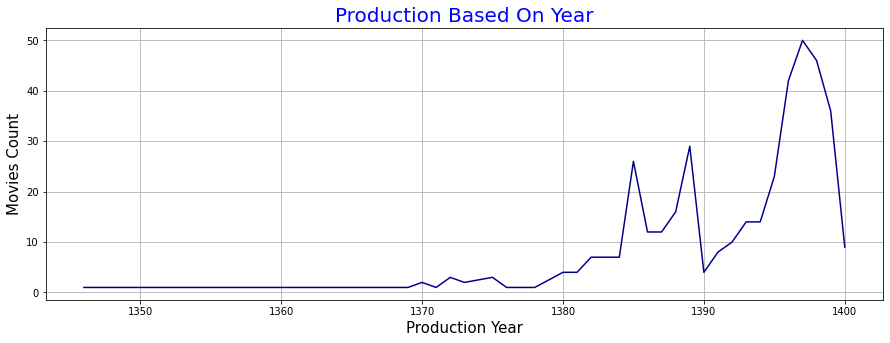

In [ ]:
'''
becouse there is no persian character in features and labels, 
i wanna plot this into a matplotlib linear chart as well :
'''
plt.figure(figsize=(15, 5))
plt.plot(year, movie_count, color = 'DarkBlue')
plt.xlabel('Production Year', size = 15)
plt.ylabel('Movies Count', size = 15)
plt.title("Production Based On Year", size = 20, color = 'b')
plt.grid()
plt.show()

###Task_4 : *Find directors with most productions*

In [ ]:
#group dataframe by producers and count their movies : 
producer_grouped = df.groupby('Producer').count()['Title'].sort_values(ascending = True)
# convert 'producer_grouped' into a pandas dataframe 
pg = pd.DataFrame(producer_grouped)
'''
pick producers which has more than 3 movies 
this is becouse i don't want messy and crowd chart:
'''
pg = pg[pg['Title']>3]
# get producers name and store them in producer variable :
producer = pg.index
'''
get movie count of each producers and
reshape array from 2D to 1D :
'''
count = pg.values.squeeze()

In [ ]:
'''
plot both producers and their relative counts,
into a horizontal bar chart,
notice in this plot we should change the values of x and y :
'''
fig = px.bar(x=count, y=producer, orientation='h')
fig.update_traces(yaxis = 'y3', xaxis = 'x2', marker_color='gray', marker_line_color='black',
                  marker_line_width=3, opacity=0.9)
fig.update_layout(
     font=dict(
        family="Courier New, monospace",
        size=20,
        color="brown"),
        title_text="کارگردان ها با بیشترین تعداد فیلم (حداقل 4 فیلم)",
                  title_font_size=30,
                   height = 800
    )

fig.show()

###Task_5 = *Find actors with most productions.*

In [ ]:

from ast import literal_eval
'''
check the values of 'Actor' column ,
their type is object,
in fact a list within a string (surrounded by single quotes),
first we need to convert them to pure list with literal_eval method :
'''
df['Actor'] = df.loc[df['Actor'].isnull()==False]['Actor'].apply(literal_eval) 
# then seperate each element in 'Actor' column lists with explode method :
actors_exploded = df.explode('Actor')
actors_exploded

,Title,Production,Actor,Producer,Rate,Rate_percent,Imdb
0,هفته ای یک بار آدم باش,1399.0,پژمان جمشیدی,شهرام شاه حسینی,NaN,NaN,NaN
0,هفته ای یک بار آدم باش,1399.0,رعنا آزادی ور,شهرام شاه حسینی,NaN,NaN,NaN
0,هفته ای یک بار آدم باش,1399.0,ساغر قناعت,شهرام شاه حسینی,NaN,NaN,NaN
0,هفته ای یک بار آدم باش,1399.0,علیرضا استادی,شهرام شاه حسینی,NaN,NaN,NaN
0,هفته ای یک بار آدم باش,1399.0,شیرین یزدان بخش,شهرام شاه حسینی,NaN,NaN,NaN
...,...,...,...,...,...,...,...
399,لاک پشت,1375.0,جمشید هاشم پور,علی شاه حاتمی,531.0,88.0,5.8
399,لاک پشت,1375.0,کتایون ریاحی,علی شاه حاتمی,531.0,88.0,5.8
399,لاک پشت,1375.0,محمود پاک نیت,علی شاه حاتمی,531.0,88.0,5.8
399,لاک پشت,1375.0,یوسف مرادیان,علی شاه حاتمی,531.0,88.0,5.8


In [ ]:
# grouping actors based on their count of movies :
actors_grouped = actors_exploded.groupby('Actor').count()['Title'].sort_values(ascending = False)
# convert actors_grouped to pandas data frame
# ag = actors grouped
ag = pd.DataFrame(actors_grouped)
'''
i want actors which has done more than 4 movies 
set it to greater than 4 in order to getting rid of messy chart:
'''
ag = ag[ag['Title']>4]
# store actor names in actor variable :
actor = ag.index
# store each actors movie count in count variable :
count = ag.values

In [ ]:
# plot actors name and movie count into a pie chart format :
pie = px.pie(
  movie_genre,
  values = count,
  names = actor,
  title = 'بازیگران با بیشترین تعداد فیلم',
  width=1000,
 height=800
)
pie.update_traces(
    textposition = 'inside',
    textinfo = 'percent+label'
)
pie.update_layout(
     font=dict(
        family="Courier New, monospace",
        size=22,
        color="RebeccaPurple"
    )
)


###Task_6 : *Find the most rated movies on filimo.*

In [ ]:
'''
group data frame by title and sum up rate for each movie,
ultimately rate values by descending order :
'''
title_grouped = df.groupby('Title').sum()['Rate'].sort_values(ascending = False)
# convert title_grouped to pandas dataframe and get only first 10 records :
tg = pd.DataFrame(title_grouped).head(10)
# get each movie title and store it in 'title' variable :
title = tg.index 
# get each movie rate and store it in 'rate' variable :
rate = tg.values.squeeze()


In [ ]:
# plot title and it's relative rate to a bar chart format : 
fig = go.Figure(data=[go.Bar(x=title, y=rate
            )])
fig.update_traces(marker_color='snow', marker_line_color='blue',
                  marker_line_width=3, opacity=0.9)
fig.update_layout(title_text="پرطرفدارترین فیلم ها در فیلیمو",
                  title_font_size=30,
                  
                   font=dict(
        family="Courier New, monospace",
        size=20,
        color="blue")
    )
                  

fig.show()

###Task_7 = *Comparsion between imdb & filimo rates.*

In [ ]:
'''
grouping dataframe by 'Title' column and sum up each rates,
notice we can use count method instead of sum as well
'''
filimo_imdb = pd.DataFrame(df.groupby('Title').sum())
filimo_imdb

,Production,Rate,Rate_percent,Imdb
Title,,,,
18-,1386.0,290.0,73.0,0.0
آب و آئینه,1393.0,45.0,77.0,0.0
آبادان یازده 60,1398.0,11904.0,95.0,6.3
آبگوشت مکبث,1389.0,82.0,68.0,5.7
آتش بس ۲ (با زیرنویس مخصوص ناشنوایان),1393.0,317.0,90.0,4.2
...,...,...,...,...
یک زندگی بهتر,1396.0,208.0,86.0,0.0
یک لحظه لبخند,1399.0,291.0,74.0,0.0
یک مسئله ساده,1398.0,525.0,65.0,0.0


In [ ]:
'''
plot imbd and rate for each movie in form of a scatter chart,
notice here we can pass rate_imdb as a argument,
then access directly to each column by just declaring their names :
'''
fig = px.scatter(rate_imdb, x="Imdb", y="Rate",
                color=rate_imdb.index
               )
fig.update_layout(title_text = 'Comparison Of Imdb & Filimo Rate',
                  title_font_size=30
                  
    )
fig.show()

##Hope it was usefull,
##Thanks for checking and please don't hesitate to give me any feedback,
##Good Luck :)